In [14]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
%matplotlib inline

img = cv2.imread('/bmw.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = img_gray.astype("float32")/255

filter_1 = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
filter_2 = filter_1*(-1)
filter_3 = np.transpose(filter_1)
filter_4 = filter_3*(-1)
filters = np.array([filter_1, filter_2, filter_3, filter_4])

In [15]:
class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(1, 4, 4)

        #checking required size of weights
        print(self.conv.weight.size())

        self.conv.weight = torch.nn.Parameter(weight)

        self.pool = nn.MaxPool2d(4, 4)
    def forward(self, x):
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        pooled_x = self.pool(activated_x)
        return conv_x, activated_x, pooled_x

filters_t = torch.Tensor(filters)

#adding additional dimension(4, 1*, 4, 4)
filters_t = filters_t.unsqueeze(1)

model = Net(filters_t)

torch.Size([4, 1, 4, 4])


In [16]:
def plot(layer):
    fig = plt.figure(figsize=(15, 15))

    for i in range(4):
        ax = fig.add_subplot(1, 4, i+1)
        ax.imshow(layer[0,i].data.numpy(), cmap='gray')
        ax.set_title('Output {}'.format(i+1))

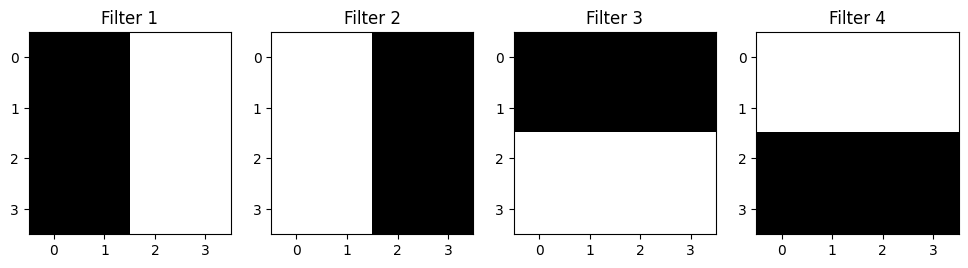

In [17]:
fig = plt.figure(figsize=(12, 6))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter {}'.format(i+1))

torch.Size([1, 1, 500, 800])

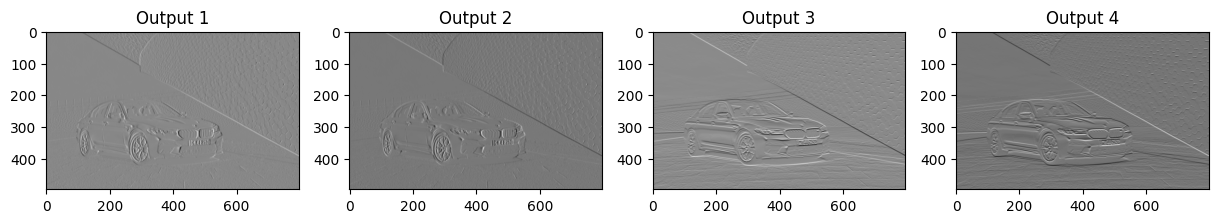

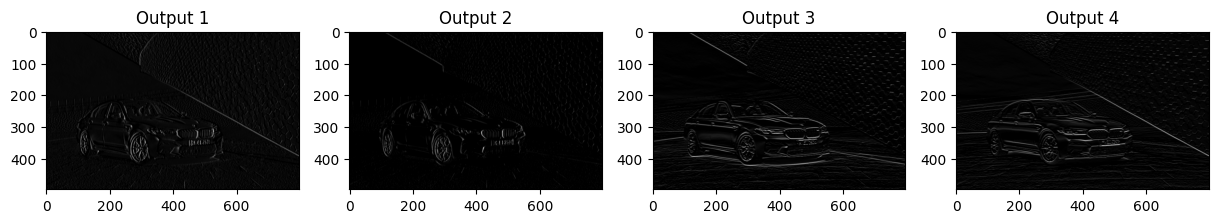

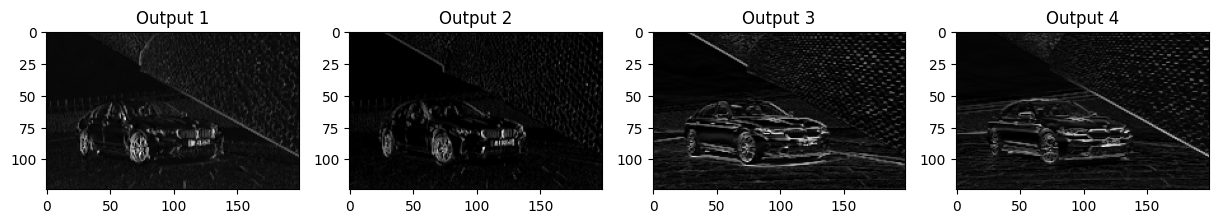

In [18]:
#adding additional dimension(1*, 1*, 500, 800)
img_gray_t = torch.Tensor(img_gray).unsqueeze(0).unsqueeze(1)

conv_layer, activated_layer, pooled_layer = model(img_gray_t)

plot(conv_layer)

plot(activated_layer)

plot(pooled_layer)
img_gray_t.shape